In [1]:
# 04/05/2022 - Trying out Gaussian MGE on J0037 by modifying fit_ngc4342 from mge_fit_example.py
# from mge_fit examples

################################################################

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist

plt.rcParams["figure.figsize"] = (8, 6)

################################################################

In [48]:
"""
This procedure reproduces Figures 8-9 in Cappellari (2002)
This example illustrates a simple MGE fit to one single HST/WFPC2 image.

"""

# write file path
#file_dir = path.dirname(path.realpath(mgefit.__file__))  # path of mgefit
file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'

file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_crop_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data

############### These values need to change... where do I get them?

# sky and psf?
# autfwhm from one of the exposures. 1.105087 pix
skylev = 0.55   # counts/pixel
img -= skylev   # subtract sky
scale = 0.0455  # arcsec/pixel
minlevel = 0.2  # counts/pixel
ngauss = 12

# Here we use an accurate four gaussians MGE PSF for
# the HST/WFPC2/F814W filter, taken from Table 3 of
# Cappellari et al. (2002, ApJ, 578, 787)

sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

##############################################################3

# Here we use FIND_GALAXY directly inside the procedure. Usually you may want
# to experiment with different values of the FRACTION keyword, before adopting
# given values of Eps, Ang, Xc, Yc.
plt.clf()
f = find_galaxy(img, fraction=0.04, plot=1)
plt.pause(1)  # Allow plot to appear on the screen

#plt.clf()
#f2 = find_galaxy(img, fraction=0.05, plot=1)
#plt.pause(1)  # Allow plot to appear on the screen

#plt.clf()
#f3 = find_galaxy(img, fraction=0.1, plot=1)
#plt.pause(1)  # Allow plot to appear on the screen


# Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                       minlevel=minlevel, plot=1)
plt.pause(1)  # Allow plot to appear on the screen

# Do the actual MGE fit
# *********************** IMPORTANT ***********************************
# For the final publication-quality MGE fit one should include the line
# "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
# at the top of this file, rename mge_fit_sectors() into
# mge_fit_sectors_regularized() and re-run the procedure.
# See the documentation of mge_fit_sectors_regularized for details.
# *********************************************************************
plt.clf()
m = mge_fit_sectors(s.radius, s.angle, s.counts, f.eps,
                    ngauss=ngauss, sigmapsf=sigmapsf, normpsf=normpsf,
                    scale=scale, plot=1, bulge_disk=0, linear=0)
plt.pause(1)  # Allow plot to appear on the screen

# Show contour plots of the results
plt.clf()
plt.subplot(121)
mge_print_contours(img.clip(minlevel), f.theta, f.xpeak, f.ypeak, m.sol, scale=scale,
                   binning=7, sigmapsf=sigmapsf, normpsf=normpsf, magrange=9)

# Extract the central part of the image to plot at high resolution.
# The MGE is centered to fractional pixel accuracy to ease visual comparson.

n = 10
print('here #############')
print(n, f.xpeak, f.ypeak)
img = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
mge_print_contours(img, f.theta, xc, yc, m.sol,
                   sigmapsf=sigmapsf, normpsf=normpsf, scale=scale)
plt.pause(1)  # Allow plot to appear on the screen

 Pixels used: 1199
 Peak Img[j, k]: 136 59
 Mean (j, k): 135.82 58.67
 Theta (deg): 70.4
 Astro PA (deg): 19.6
 Eps: 0.166
 Major axis (pix): 23.2


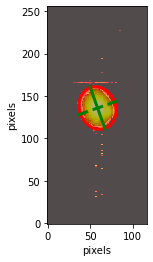

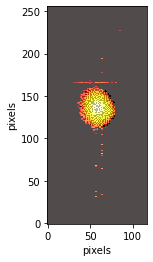

Iteration:1  chi2: 26.91  Nonzero: 5/12
Nonzero Gaussians: 3/12
Eliminating not useful Gaussians...
ngauss: 2          chi2: 21.36
Starting nonlinear fit...
Iteration:1  chi2: 21.36  Nonzero: 2/2
Nonzero Gaussians: 2/2
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.23 seconds
  Total Iterations:  7
 Nonzero Gaussians:  2
  Unused Gaussians:  10
 Sectors used in the fit:  19
 Total number of points fitted:  299
 Chi2: 21.29 
 STDEV: 0.2572 
 MEANABSDEV: 0.1713 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  1.521746e+03      1.93387     0.865448
  1.522864e+04      6.82076     0.786029
++++++++++++++++++++++++++++++++++++++++++++


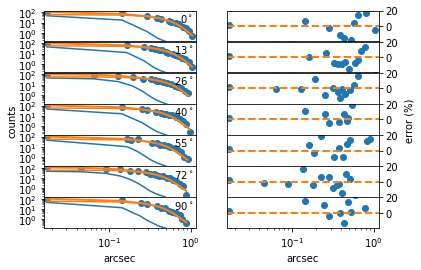

here #############
50 136 59


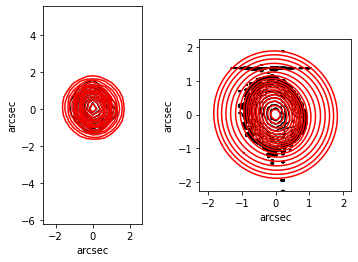

In [52]:
# Let's try this with the full image

"""
This procedure reproduces Figures 8-9 in Cappellari (2002)
This example illustrates a simple MGE fit to one single HST/WFPC2 image.

"""

# write file path
#file_dir = path.dirname(path.realpath(mgefit.__file__))  # path of mgefit
file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'

file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data

############### These values need to change... where do I get them?

# sky and psf?
# autfwhm from one of the exposures. 1.105087 pix
#skylev = 0.55   # counts/pixel
#img -= skylev   # subtract sky
scale = 0.0455  # arcsec/pixel
minlevel = 0.2  # counts/pixel
ngauss = 12

# Here we use an accurate four gaussians MGE PSF for
# the HST/WFPC2/F814W filter, taken from Table 3 of
# Cappellari et al. (2002, ApJ, 578, 787)

sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

##############################################################3

# Here we use FIND_GALAXY directly inside the procedure. Usually you may want
# to experiment with different values of the FRACTION keyword, before adopting
# given values of Eps, Ang, Xc, Yc.
plt.clf()
f = find_galaxy(img, fraction=0.04, plot=1)
plt.pause(1)  # Allow plot to appear on the screen

#plt.clf()
#f2 = find_galaxy(img, fraction=0.05, plot=1)
#plt.pause(1)  # Allow plot to appear on the screen

#plt.clf()
#f3 = find_galaxy(img, fraction=0.1, plot=1)
#plt.pause(1)  # Allow plot to appear on the screen


# Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                       minlevel=minlevel, plot=1)
plt.pause(1)  # Allow plot to appear on the screen

# Do the actual MGE fit
# *********************** IMPORTANT ***********************************
# For the final publication-quality MGE fit one should include the line
# "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
# at the top of this file, rename mge_fit_sectors() into
# mge_fit_sectors_regularized() and re-run the procedure.
# See the documentation of mge_fit_sectors_regularized for details.
# *********************************************************************
plt.clf()
m = mge_fit_sectors(s.radius, s.angle, s.counts, f.eps,
                    ngauss=ngauss, sigmapsf=sigmapsf, normpsf=normpsf,
                    scale=scale, plot=1, bulge_disk=0, linear=0)
plt.pause(1)  # Allow plot to appear on the screen

# Show contour plots of the results
plt.clf()
plt.subplot(121)
mge_print_contours(img.clip(minlevel), f.theta, f.xpeak, f.ypeak, m.sol, scale=scale,
                   binning=7, sigmapsf=sigmapsf, normpsf=normpsf, magrange=9)

# Extract the central part of the image to plot at high resolution.
# The MGE is centered to fractional pixel accuracy to ease visual comparson.

n = 10
print('here #############')
print(n, f.xpeak, f.ypeak)
img = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
mge_print_contours(img, f.theta, xc, yc, m.sol,
                   sigmapsf=sigmapsf, normpsf=normpsf, scale=scale)
plt.pause(1)  # Allow plot to appear on the screen

In [55]:
img.shape

(256, 117)

Calculating fraction 0.03
Calculating fraction 0.04
Calculating fraction 0.05
Calculating fraction 0.060000000000000005
Calculating fraction 0.07
Calculating fraction 0.08000000000000002
Calculating fraction 0.09000000000000001
Calculating fraction 0.1
Calculating fraction 0.11000000000000001
Calculating fraction 0.12000000000000002
Calculating fraction 0.13
Calculating fraction 0.14
Calculating fraction 0.15000000000000002
Calculating fraction 0.16000000000000003
Calculating fraction 0.17
Calculating fraction 0.18000000000000002
Calculating fraction 0.19000000000000003
Calculating fraction 0.20000000000000004
Calculating fraction 0.21000000000000005
Calculating fraction 0.22000000000000003
Calculating fraction 0.23000000000000004
Calculating fraction 0.24000000000000005
Calculating fraction 0.25
Calculating fraction 0.26
Calculating fraction 0.27
Calculating fraction 0.28
Calculating fraction 0.29000000000000004
Calculating fraction 0.30000000000000004
Calculating fraction 0.310000000

<Figure size 432x288 with 0 Axes>

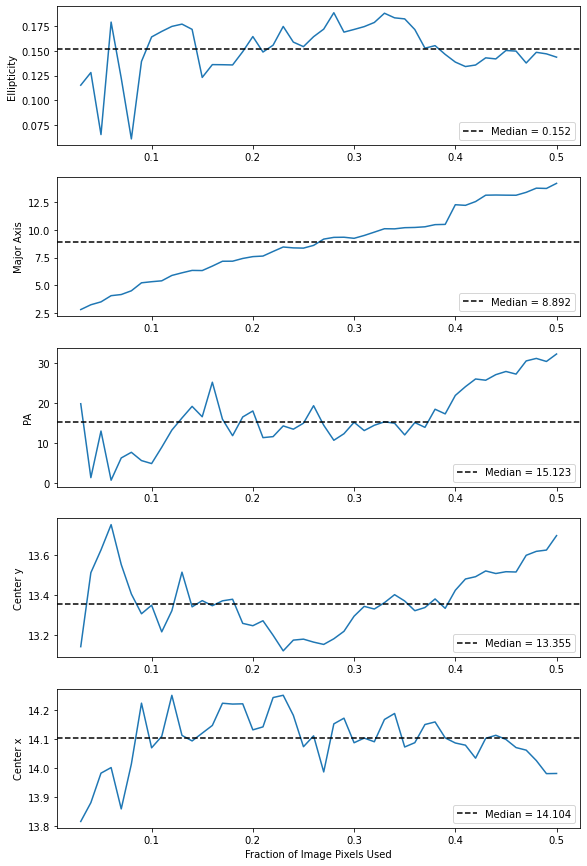

<Figure size 432x288 with 0 Axes>

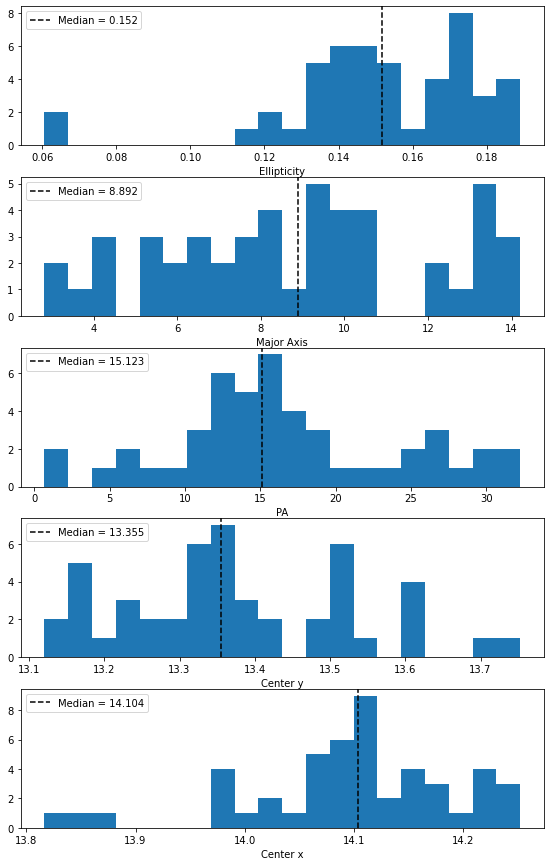

In [103]:
fractions = np.arange(0.03, 0.51, 0.01)

ell_list = []
maj_ax_list = []
pa_list = []
cen_y_list = []
cen_x_list = []

for frac in fractions:
    print(f'Calculating fraction {frac}')
    #plt.clf()
    f = find_galaxy(img, fraction=frac, plot=0, quiet=True)
    ell = f.eps
    maj_ax = f.majoraxis    
    pa = f.pa
    cen_y = f.ymed
    cen_x = f.xmed
    # assign to lists
    ell_list.append(ell)
    maj_ax_list.append(maj_ax) # this part didn't work
    pa_list.append(pa)
    cen_y_list.append(cen_y)
    cen_x_list.append(cen_x)
    #plt.pause(1)  # Allow plot to appear on the screen

ell_med = np.median(ell_list)
maj_ax_med = np.median(maj_ax_list)
pa_med = np.median(pa_list)
cen_y_med = np.median(cen_y_list)
cen_x_med = np.median(cen_x_list)
    
plt.clf()    
fig, axs = plt.subplots(5, figsize=(8, 12))
fig.tight_layout()
axs[0].plot(fractions, ell_list)
axs[0].axhline(ell_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(ell_med)}')
axs[0].set_ylabel('Ellipticity')
axs[0].legend(loc='lower right')
axs[1].plot(fractions, maj_ax_list)
axs[1].axhline(maj_ax_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(maj_ax_med)}')
axs[1].set_ylabel('Major Axis')
axs[1].legend(loc='lower right')
axs[2].plot(fractions, pa_list)
axs[2].axhline(pa_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(pa_med)}')
axs[2].set_ylabel('PA')
axs[2].legend(loc='lower right')
axs[3].plot(fractions, cen_y_list)
axs[3].axhline(cen_y_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_y_med)}')
axs[3].set_ylabel('Center y')
axs[3].legend(loc='lower right')
axs[4].plot(fractions, cen_x_list)
axs[4].axhline(cen_x_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_x_med)}')
axs[4].set_ylabel('Center x')
axs[4].set_xlabel('Fraction of Image Pixels Used')
axs[4].legend(loc='lower right')
plt.pause(1)

plt.clf()    
fig, axs = plt.subplots(5, figsize=(8, 12))
fig.tight_layout()
bins = 20
loc = 'upper left'
axs[0].hist(ell_list, bins)
axs[0].axvline(ell_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(ell_med)}')
axs[0].set_xlabel('Ellipticity')
axs[0].legend(loc=loc)
axs[1].hist(maj_ax_list, bins)
axs[1].axvline(maj_ax_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(maj_ax_med)}')
axs[1].set_xlabel('Major Axis')
axs[1].legend(loc=loc)
axs[2].hist(pa_list, bins)
axs[2].axvline(pa_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(pa_med)}')
axs[2].set_xlabel('PA')
axs[2].legend(loc=loc)
axs[3].hist(cen_y_list, bins)
axs[3].axvline(cen_y_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_y_med)}')
axs[3].set_xlabel('Center y')
axs[3].legend(loc=loc)
axs[4].hist(cen_x_list, bins)
axs[4].axvline(cen_x_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_x_med)}')
axs[4].set_xlabel('Center x')
#axs[4].set_label('Fraction of Image Pixels Used')
axs[4].legend(loc=loc)
plt.pause(1)

In [7]:
file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'

file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data
header = hdu[0].header

print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  117                                                  NAXIS2  =                  256                                                  COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = '2021-08-13T14:56:44' / file creation date (YYYY-MM-DDThh:mm:ss UT)   COMMENT BEGIN detector-server-specific keywords                                 OFNAME  = 'kb210813_00042.fits' / original file name                            DATEPCLR= '2021-08-13T14:23:54.898' / most recent erase                         DATEREND= '2021-08-13T14:56:44.271' / readout end                               TTIME   =                1800. / [s] tar

0.7341726932211717


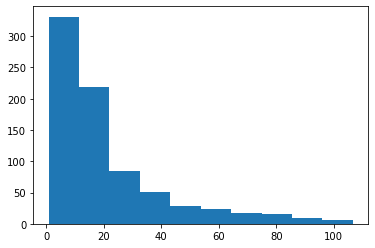

In [6]:
plt.hist(np.ravel(img))
print(img.min())

In [10]:
0.5/scale/2.355

1.4443144561433916

In [98]:
np.around(0.034, 2)

0.03

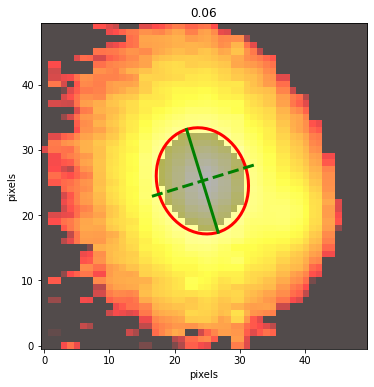

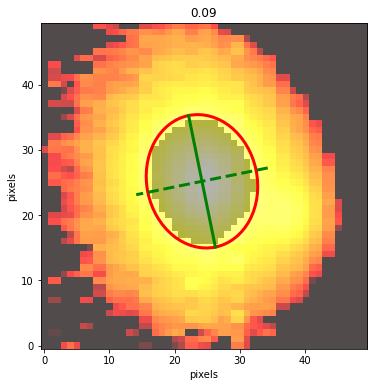

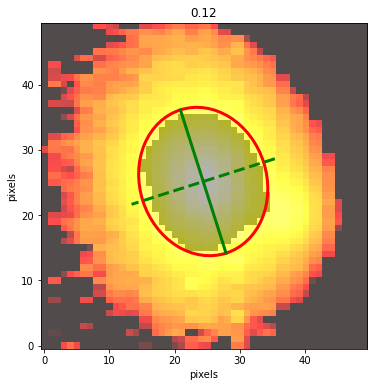

<Figure size 576x432 with 0 Axes>

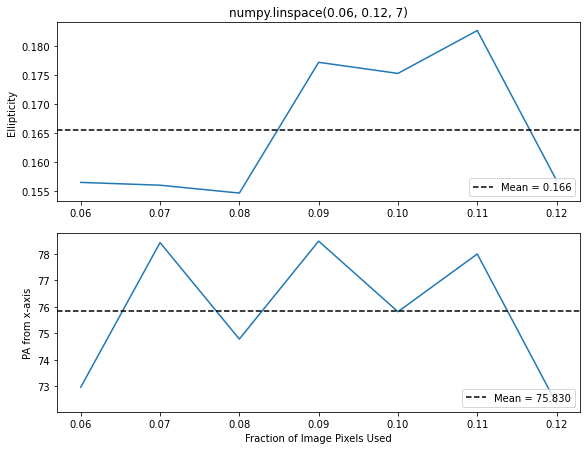

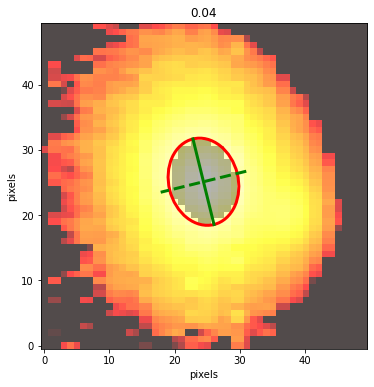

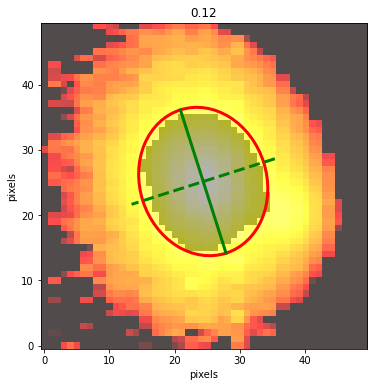

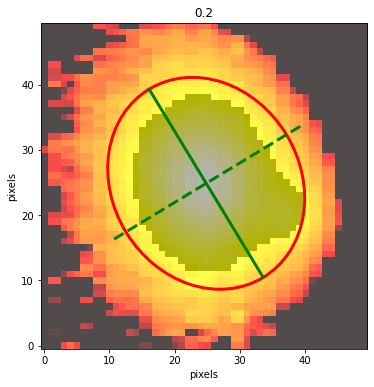

<Figure size 576x432 with 0 Axes>

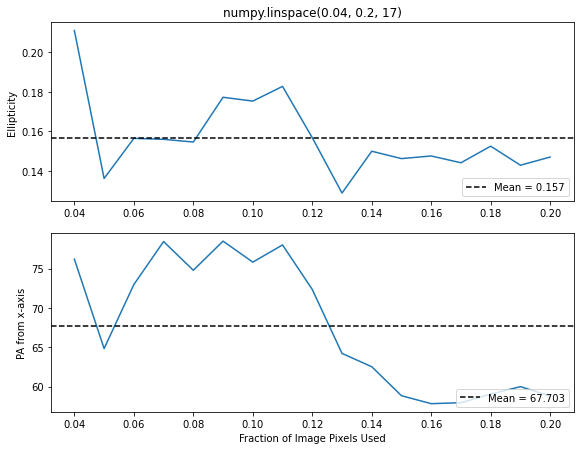

KeyboardInterrupt: 

In [2]:
# show the differences!
# Crop it, but not quite as close

"""
This procedure reproduces Figures 8-9 in Cappellari (2002)
This example illustrates a simple MGE fit to one single HST/WFPC2 image.

"""

# write file path
#file_dir = path.dirname(path.realpath(mgefit.__file__))  # path of mgefit
file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'

file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data
hdu.close()

# crop the image to ~ 50 pixels
central_pix = np.unravel_index(np.argmax(img, axis=None), img.shape)
central_pix_x = central_pix[1]
central_pix_y = central_pix[0]


crop_width = 50
half_width = int(crop_width/2)
img = img[central_pix_y - half_width:central_pix_y + half_width, central_pix_x - half_width:central_pix_x + half_width]

plt.clf()
plt.imshow(img)


############### These values need to change... where do I get them?

# sky and psf?
# autfwhm from one of the exposures. 1.105087 pix
#skylev = 0.55   # counts/pixel
#img -= skylev   # subtract sky
scale = 0.147  # arcsec/pixel
minlevel = 1  # counts/pixel
ngauss = 12

# Here we use an accurate four gaussians MGE PSF for
# the HST/WFPC2/F814W filter, taken from Table 3 of
# Cappellari et al. (2002, ApJ, 578, 787)

#sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
#normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

# Keck median seeing is 0.5 arcsec
seeing_fwhm = 0.5 # arcsec
sigmapsf = seeing_fwhm / scale / 2.355 # pixels, 2.355 is fwhm/sigma

##############################################################3

# Here we use FIND_GALAXY directly inside the procedure. Usually you may want
# to experiment with different values of the FRACTION keyword, before adopting
# given values of Eps, Ang, Xc, Yc.

def test_fractions (lower, upper, steps):

    fractions = np.linspace(lower, upper, steps)
    
    eps_list = []
    theta_list = []
    #cen_y_list = [] # don't need these, already centered it
    #cen_x_list = []
        
    for frac in fractions:
        #print(f'Calculating fraction {frac}')
        frac = np.around(frac, 2)
        mid = np.around((upper+lower)/2, 2)
        plt.clf()
        if (frac==lower) | (frac==mid) | (frac==upper):
            plot = 1
        else:
            plot = 0
        f = find_galaxy(img, fraction=frac, plot=plot, quiet=True)
        eps = f.eps
        theta = f.theta
        #cen_y = f.ypeak
        #cen_x = f.xpeak
        # assign to lists
        eps_list.append(eps)
        theta_list.append(theta)
        #cen_y_list.append(cen_y)
        #cen_x_list.append(cen_x)
        if plot == 1:
            plt.title(f'{frac}')
            plt.pause(1)  # Allow plot to appear on the screen

    eps_mean = np.mean(eps_list)
    theta_mean = np.mean(theta_list)
    #cen_y_med = np.median(cen_y_list)
    #cen_x_med = np.median(cen_x_list)

    # plot each
    plt.clf()    
    fig, axs = plt.subplots(2, figsize=(8, 6))
    fig.tight_layout()
    axs[0].set_title(f'numpy.linspace{lower, upper, steps}')
    axs[0].plot(fractions, eps_list)
    axs[0].axhline(eps_mean, color='k', linestyle='--', label=f'Mean = {"{:.3f}".format(eps_mean)}')
    axs[0].set_ylabel('Ellipticity')
    axs[0].legend(loc='lower right')
    axs[1].plot(fractions, theta_list)
    axs[1].axhline(theta_mean, color='k', linestyle='--', label=f'Mean = {"{:.3f}".format(theta_mean)}')
    axs[1].set_ylabel('PA from x-axis')
    axs[1].legend(loc='lower right')
    #axs[2].plot(fractions, cen_y_list)
    #axs[2].axhline(cen_y_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_y_med)}')
    #axs[2].set_ylabel('Center y')
    #axs[2].legend(loc='lower right')
    #axs[3].plot(fractions, cen_x_list)
    #axs[3].axhline(cen_x_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_x_med)}')
    #axs[3].set_ylabel('Center x')
    axs[1].set_xlabel('Fraction of Image Pixels Used')
    #axs[3].legend(loc='lower right')
    plt.pause(1)
    
test_fractions(0.06, 0.12, 7)
test_fractions(0.04, 0.20, 17)
test_fractions(0.02, 0.30, 29)

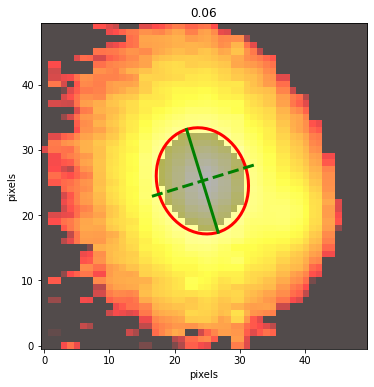

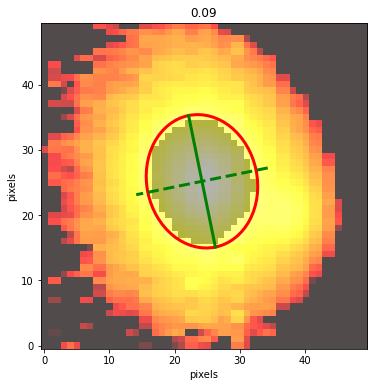

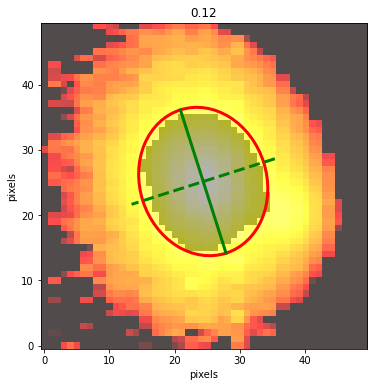

<Figure size 576x432 with 0 Axes>

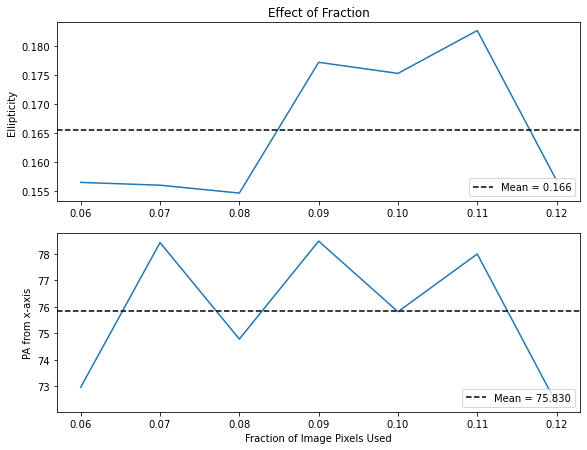

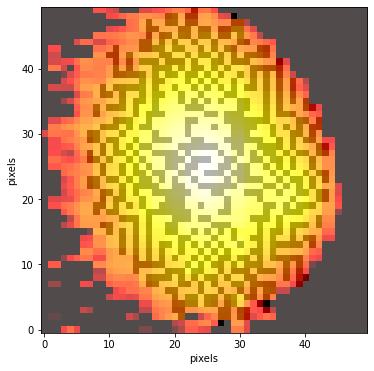

Iteration:1  chi2: 2.606  Nonzero: 5/12
Iteration:11  chi2: 2.451  Nonzero: 3/12
Iteration:21  chi2: 2.450  Nonzero: 3/12
Iteration:31  chi2: 2.450  Nonzero: 3/12
Iteration:41  chi2: 2.449  Nonzero: 3/12
Iteration:51  chi2: 2.448  Nonzero: 3/12
Iteration:61  chi2: 2.448  Nonzero: 3/12
Iteration:71  chi2: 2.447  Nonzero: 3/12
Nonzero Gaussians: 3/12
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration:1  chi2: 2.439  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.86 seconds
  Total Iterations:  80
 Nonzero Gaussians:  3
  Unused Gaussians:  9
 Sectors used in the fit:  19
 Total number of points fitted:  285
 Chi2: 2.435 
 STDEV: 0.09204 
 MEANABSDEV: 0.0693 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  2.464094e+02      1.16412     0.825118
  4.519806e+03      3.5021

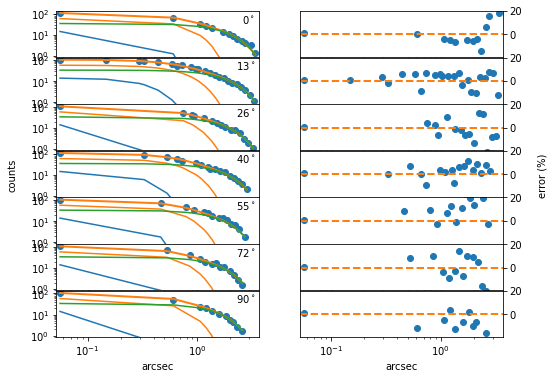

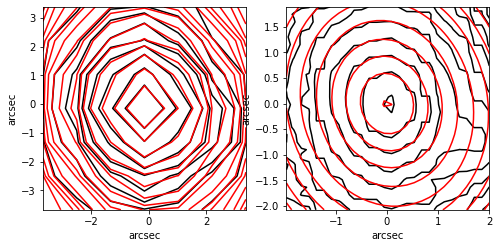

In [159]:
# Crop it, but not quite as close

"""
This procedure reproduces Figures 8-9 in Cappellari (2002)
This example illustrates a simple MGE fit to one single HST/WFPC2 image.

"""

# write file path
#file_dir = path.dirname(path.realpath(mgefit.__file__))  # path of mgefit
file_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/CF_mosaics/SDSSJ0037-0942'

file = file_dir + "/KCWI_J0037_icubes_mosaic_0.1457_2Dintegrated.fits"

hdu = fits.open(file)
img = hdu[0].data
hdu.close()

# crop the image to ~ 50 pixels
central_pix = np.unravel_index(np.argmax(img, axis=None), img.shape)
central_pix_x = central_pix[1]
central_pix_y = central_pix[0]


crop_width = 50
half_width = int(crop_width/2)
img = img[central_pix_y - half_width:central_pix_y + half_width, central_pix_x - half_width:central_pix_x + half_width]

plt.clf()
plt.imshow(img)


############### These values need to change... where do I get them?

# sky and psf?
# autfwhm from one of the exposures. 1.105087 pix
#skylev = 0.55   # counts/pixel
#img -= skylev   # subtract sky
scale = 0.147  # arcsec/pixel
minlevel = 1  # counts/pixel
ngauss = 12

# Here we use an accurate four gaussians MGE PSF for
# the HST/WFPC2/F814W filter, taken from Table 3 of
# Cappellari et al. (2002, ApJ, 578, 787)

#sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
#normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

# Keck median seeing is 0.5 arcsec
seeing_fwhm = 0.5 # arcsec
sigmapsf = seeing_fwhm / scale / 2.355 # pixels, 2.355 is fwhm/sigma

##############################################################3

# Here we use FIND_GALAXY directly inside the procedure. Usually you may want
# to experiment with different values of the FRACTION keyword, before adopting
# given values of Eps, Ang, Xc, Yc.

lower, upper, steps = (0.06, 0.12, 7)

fractions = np.linspace(lower, upper, steps)
    
eps_list = []
theta_list = []
#cen_y_list = [] # don't need these, already centered it
#cen_x_list = []

for frac in fractions:
    #print(f'Calculating fraction {frac}')
    frac = np.around(frac, 2)
    mid = np.around((upper+lower)/2, 2)
    plt.clf()
    if (frac==lower) | (frac==mid) | (frac==upper):
        plot = 1
    else:
        plot = 0
    plt.clf()
    f = find_galaxy(img, fraction=frac, plot=1, quiet=True)
    eps = f.eps
    theta = f.theta
    #cen_y = f.ypeak
    #cen_x = f.xpeak
    # assign to lists
    eps_list.append(eps)
    theta_list.append(theta)
    #cen_y_list.append(cen_y)
    #cen_x_list.append(cen_x)
    if plot == 1:
        plt.title(f'{frac}')
        plt.pause(1)  # Allow plot to appear on the screen

eps_mean = np.mean(eps_list)
theta_mean = np.mean(theta_list)
#cen_y_med = np.median(cen_y_list)
#cen_x_med = np.median(cen_x_list)

# plot each
plt.clf()    
fig, axs = plt.subplots(2, figsize=(8, 6))
fig.tight_layout()
axs[0].set_title(f'Effect of Fraction')
axs[0].plot(fractions, eps_list)
axs[0].axhline(eps_mean, color='k', linestyle='--', label=f'Mean = {"{:.3f}".format(eps_mean)}')
axs[0].set_ylabel('Ellipticity')
axs[0].legend(loc='lower right')
axs[1].plot(fractions, theta_list)
axs[1].axhline(theta_mean, color='k', linestyle='--', label=f'Mean = {"{:.3f}".format(theta_mean)}')
axs[1].set_ylabel('PA from x-axis')
axs[1].legend(loc='lower right')
#axs[2].plot(fractions, cen_y_list)
#axs[2].axhline(cen_y_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_y_med)}')
#axs[2].set_ylabel('Center y')
#axs[2].legend(loc='lower right')
#axs[3].plot(fractions, cen_x_list)
#axs[3].axhline(cen_x_med, color='k', linestyle='--', label=f'Median = {"{:.3f}".format(cen_x_med)}')
#axs[3].set_ylabel('Center x')
axs[1].set_xlabel('Fraction of Image Pixels Used')
#axs[3].legend(loc='lower right')
plt.pause(1)

# Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, eps_med, theta_med, f.xpeak, f.ypeak,
                       minlevel=minlevel, plot=1)
plt.pause(1)  # Allow plot to appear on the screen

# Do the actual MGE fit
# *********************** IMPORTANT ***********************************
# For the final publication-quality MGE fit one should include the line
# "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
# at the top of this file, rename mge_fit_sectors() into
# mge_fit_sectors_regularized() and re-run the procedure.
# See the documentation of mge_fit_sectors_regularized for details.
# *********************************************************************
plt.clf()
m = mge_fit_sectors(s.radius, s.angle, s.counts, eps_med,
                    ngauss=ngauss, sigmapsf=sigmapsf, #normpsf=normpsf,
                    scale=scale, plot=1, bulge_disk=0, linear=0)
plt.pause(1)  # Allow plot to appear on the screen

# Show contour plots of the results
plt.clf()
plt.subplot(121)
mge_print_contours(img.clip(minlevel), theta_med, f.xpeak, f.ypeak, m.sol, scale=scale,
                   binning=7, sigmapsf=sigmapsf, #normpsf=normpsf, 
                   magrange=9)

# Extract the central part of the image to plot at high resolution.
# The MGE is centered to fractional pixel accuracy to ease visual comparson.

n = int(np.around(2/scale))
img = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
mge_print_contours(img, theta_med, xc, yc, m.sol,
                   sigmapsf=sigmapsf, #normpsf=normpsf, 
                   scale=scale)
plt.pause(1)  # Allow plot to appear on the screen


Fitting 1-dim profile-----------------------------------


Fitting M32---------------------------------------------


Fitting NGC4342-----------------------------------------

image axis748
 Pixels used: 22608
 Peak Img[j, k]: 356 366
 Mean (j, k): 356.10 365.58
 Theta (deg): 54.2
 Astro PA (deg): 35.8
 Eps: 0.579
 Major axis (pix): 146.4


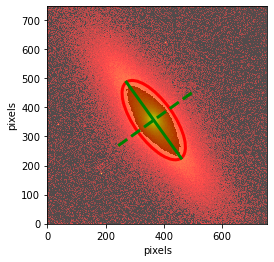

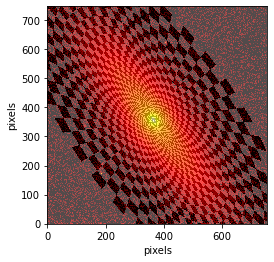

Iteration:1  chi2: 42.45  Nonzero: 12/12
Iteration:11  chi2: 3.173  Nonzero: 11/12
Iteration:21  chi2: 1.792  Nonzero: 12/12
Iteration:31  chi2: 0.7886  Nonzero: 12/12
Iteration:41  chi2: 0.7400  Nonzero: 12/12
Nonzero Gaussians: 12/12
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 1.98 seconds
  Total Iterations:  41
 Nonzero Gaussians:  12
  Unused Gaussians:  0
 Sectors used in the fit:  19
 Total number of points fitted:  882
 Chi2: 0.74 
 STDEV: 0.02895 
 MEANABSDEV: 0.01764 
############################################
  Total_Counts  sigma_Pixels      q_obs
############################################
  8.656845e+03     0.605206     0.805034
  2.988172e+04      2.12642     0.896831
  1.342710e+05      6.43765     0.713237
  4.855555e+04      7.38900     0.178243
  2.663905e+05      13.3541     0.758412
  2.580994e+05      24.5163     0.878233
  1.381267e+05      44.5135     1.000000
  3.468052e+05    

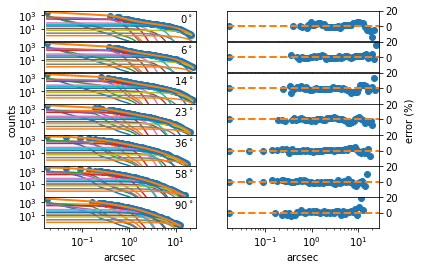

here ###########################
50 306 406 316 416


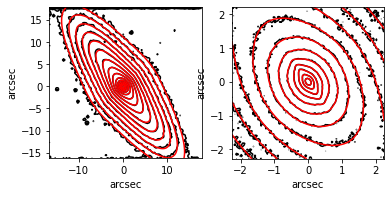


Fitting NGC5831 twist-----------------------------------



In [37]:
#!/usr/bin/env python

"""
    This example illustrates how to obtain an MGE fit from a galaxy image
    using the mge_fit_sectors package and how to verify the results.

    V1.0.0: Translated NGC4342 example from the corresponding IDL version.
        Michele Cappellari, Aspen Airport, 8 February 2014
    V1.0.1: Fixed incorrect offset in high-res contour plot.
        Use arcsec pixel scale. MC, Oxford, 18 September 2014
    V1.1.0: Translated M32 example of fitting to two images simultaneously.
        MC, Oxford, 18 June 2015
    V1.1.1: Support both Pyfits and Astropy to read FITS files.
        MC, Oxford, 23 October 2015
    V1.1.2: Make files paths relative to this file, to run the example
        from any directory. MC, Oxford, 20 January 2017
    V1.1.3: Included fit_1d() example. Added important note about
        mge_fit_sectors_regularized(). MC, Oxford, 14 February 2017
    V1.2.0: Illustrates how to efficiently mask an object before MGE fitting.
        Included dist_circle() function. MC, Oxford, 17 March 2017
    V1.3.0: Modified comment about import of mge_fit_sectors_regularized.
        Thanks to Evgeny Vasilyev (Oxford) for the suggestion.
        Included fit_ngc5831_twist() example and corresponding imports.
        MC, Oxford, 27 July 2017
    V1.3.1: Make path relative to package to run the example from any directory.
        MC, Oxford, 17 April 2018

"""

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist


#----------------------------------------------------------------------------

def dist_circle(xc, yc, s):
    """
    Returns an array in which the value of each element is its distance from
    a specified center. Useful for masking inside a circular aperture.

    The (xc, yc) coordinates are the ones one can read on the figure axes
    e.g. when plotting the result of my find_galaxy() procedure.

    """
    x, y = np.ogrid[-yc:s[0] - yc, -xc:s[1] - xc]   # note yc before xc
    rad = np.sqrt(x**2 + y**2)

    return rad


#----------------------------------------------------------------------------

def fit_ngc4342():
    """
    This procedure reproduces Figures 8-9 in Cappellari (2002)
    This example illustrates a simple MGE fit to one single HST/WFPC2 image.

    """

    file_dir = path.dirname(path.realpath(mgefit.__file__))  # path of mgefit

    file = file_dir + "/images/ngc4342_f814w_pc.fits"

    hdu = fits.open(file)
    img = hdu[0].data

    skylev = 0.55   # counts/pixel
    img -= skylev   # subtract sky
    scale = 0.0455  # arcsec/pixel
    minlevel = 0.2  # counts/pixel
    ngauss = 12
    
    print('image axis' + str(img.shape[0]))

    # Here we use an accurate four gaussians MGE PSF for
    # the HST/WFPC2/F814W filter, taken from Table 3 of
    # Cappellari et al. (2002, ApJ, 578, 787)

    sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
    normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1

    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    plt.clf()
    f = find_galaxy(img, fraction=0.04, plot=1)
    plt.pause(1)  # Allow plot to appear on the screen

    # Perform galaxy photometry
    plt.clf()
    s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                           minlevel=minlevel, plot=1)
    plt.pause(1)  # Allow plot to appear on the screen

    # Do the actual MGE fit
    # *********************** IMPORTANT ***********************************
    # For the final publication-quality MGE fit one should include the line
    # "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
    # at the top of this file, rename mge_fit_sectors() into
    # mge_fit_sectors_regularized() and re-run the procedure.
    # See the documentation of mge_fit_sectors_regularized for details.
    # *********************************************************************
    plt.clf()
    m = mge_fit_sectors(s.radius, s.angle, s.counts, f.eps,
                        ngauss=ngauss, sigmapsf=sigmapsf, normpsf=normpsf,
                        scale=scale, plot=1, bulge_disk=0, linear=0)
    plt.pause(1)  # Allow plot to appear on the screen

    # Show contour plots of the results
    plt.clf()
    plt.subplot(121)
    mge_print_contours(img.clip(minlevel), f.theta, f.xpeak, f.ypeak, m.sol, scale=scale,
                       binning=7, sigmapsf=sigmapsf, normpsf=normpsf, magrange=9)

    # Extract the central part of the image to plot at high resolution.
    # The MGE is centered to fractional pixel accuracy to ease visual comparson.

    n = 50
    print('here ###########################')
    print(n, f.xpeak-n, f.xpeak+n, f.ypeak-n, f.ypeak+n)
    img = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
    xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
    plt.subplot(122)
    mge_print_contours(img, f.theta, xc, yc, m.sol,
                       sigmapsf=sigmapsf, normpsf=normpsf, scale=scale)
    plt.pause(1)  # Allow plot to appear on the screen



#----------------------------------------------------------------------------

if __name__ == '__main__':

    print("\nFitting 1-dim profile-----------------------------------\n")
    #fit_1d()

    print("\nFitting M32---------------------------------------------\n")
    #fit_m32()

    print("\nFitting NGC4342-----------------------------------------\n")
    fit_ngc4342()

    print("\nFitting NGC5831 twist-----------------------------------\n")
    #fit_ngc5831_twist()
